Machine Learning Algorithm
- 지도 학습 Supervised Learning
- 비지도 학습 Unsupervised Learning
- 강화 학습 Reinforcement Learning (실습X)

지도 학습 Supervised Learning

### K-NN (K-Nearest Neighbor)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier  # classifier 분류


$$
    \begin{pmatrix}
    1 & 2 \\
    2 & 3 \\
    3 & 4 \\
    6 & 7 \\
    7 & 8 \\
    8 & 9 \\
    \end{pmatrix}
$$

In [2]:
x = np.zeros((6,2))
for i in range(1,9):
    if i == 4 and i == 5: continue
    x = np.array([i,i+1])
x

array([8, 9])

In [3]:
# x_train = np.array([
#     [1,2]
#     [2,3]
#     [3,4]
#     [6,7]
#     [7,8]
#     [8,9]
# ])

# 훈련용 데이터
x_train = np.array([[i,i+1] for i in range(1,9) if i not in (4,5)])
y_train = np.array([0,0,0,1,1,1])
x_train
y_train

array([0, 0, 0, 1, 1, 1])

In [4]:
# 모델 테스트용 데이터
x_test = np.array([[6,6]])
x_test
# y_test = np.array([])

array([[6, 6]])

In [5]:
K = 3
knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [6]:
knn.score(x_train,y_train)
predicted_label = knn.predict(x_test)

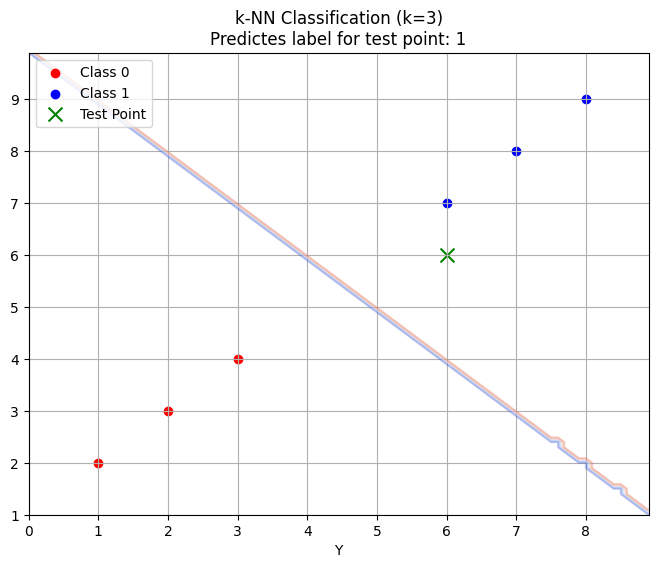

In [7]:
plt.figure(figsize = (8,6))
for i, point in enumerate(x_train):
    plt.scatter(point[0],point[1], c='r' if y_train[i]==0 else 'b', marker='o',
                label = 'Class 0' if y_train[i]==0 and i==0 else ('Class 1' if y_train[i]==1 and i==3 else ''))
    
plt.scatter(x_test[0,0], x_test[0,1], c='g', marker='x', s=100, label='Test Point')

x_min, x_max = x_train[:,0].min()-1, x_train[:,0].max()+1
y_min, y_max = x_train[:,1].min()-1, x_train[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = knn.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

plt.legend()
plt.xlabel('X')
plt.xlabel('Y')
plt.title(f"k-NN Classification (k={K})\nPredictes label for test point: {predicted_label[0]}")
plt.grid(True)
plt.show()


### SVM(Support Vector Machine)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


In [9]:
# 복잡한 샘플 생성
x_train, y_train = make_blobs(n_samples=100, centers=2, random_state=42, cluster_std=2)

# 테스트 데이터
x_test = np.array([[0,0]])
x_train
# y_train

array([[-3.4675461 ,  8.64296817],
       [ 6.80598132,  4.08077379],
       [-3.59796307,  9.23613131],
       [ 6.28399916,  5.76675565],
       [ 5.09479871,  4.58745519],
       [-1.78640641, 12.09035926],
       [ 5.19326043,  3.62753618],
       [ 1.53855197,  2.11029563],
       [-3.29341393,  6.08725623],
       [-4.18763267,  8.39586138],
       [-2.37414121,  6.16478976],
       [ 2.16597741, -0.66774354],
       [-3.44814639, 10.09940622],
       [-5.16556972,  9.4080086 ],
       [ 3.27982939,  2.43767708],
       [ 3.07337225,  1.32904665],
       [ 4.76033926,  6.89965391],
       [ 2.49809384,  2.93811451],
       [ 4.75629627, -0.31277091],
       [-2.32567607,  5.0391483 ],
       [ 5.06806632, -0.51830787],
       [ 4.25515691,  2.57626437],
       [ 6.22194273,  0.15439477],
       [ 6.56663109,  2.79873154],
       [ 5.15964442,  3.53681543],
       [ 0.64922801, 10.54915559],
       [ 4.48567542,  2.65547363],
       [-0.88414598, 11.72676619],
       [ 5.68376197,

In [10]:
svm_model = svm.SVC()
svm_model.fit(x_train,y_train)

SVC()

In [11]:
# 예측
predicted_label = svm_model.predict(x_test)
predicted_label

array([1])

In [12]:
def scatter_vis(X_train, y_train, X_test, model, figsize=(6, 6),):
    """_summary_
    Args:
        X_train (_type_): 훈련 데이터 셋
        y_train (_type_): 훈련 데이터 레이블
        X_test (_type_): 테스트용 데이터
        model (_type_): 만든 머신러닝 모델 작성
        figsize (tuple, optional): Defaults to (6, 6).
    """
    plt.figure(figsize=figsize)
    for i, point in enumerate(X_train):
        plt.scatter(point[0], point[1], c='r' if y_train[i] == 0 else 'b', marker='o',
                    label='Class 0' if y_train[i] == 0 and i == 0 else ('Class 1' if y_train[i] == 1 and i == 1 else ''))
    plt.scatter(X_test[0, 0], X_test[0, 1], c='g', marker='x', s=100, label='Test Point')
    x_min, x_max = X_train[:, 0].min()-1, X_train[:, 0].max()+1
    y_min, y_max = X_train[:, 1].min()-1, X_train[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    return xx, yy, Z


C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_24080\3301688924.py:3: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(xx, yy, Z, levels = [0], linewidths=2, color='k')


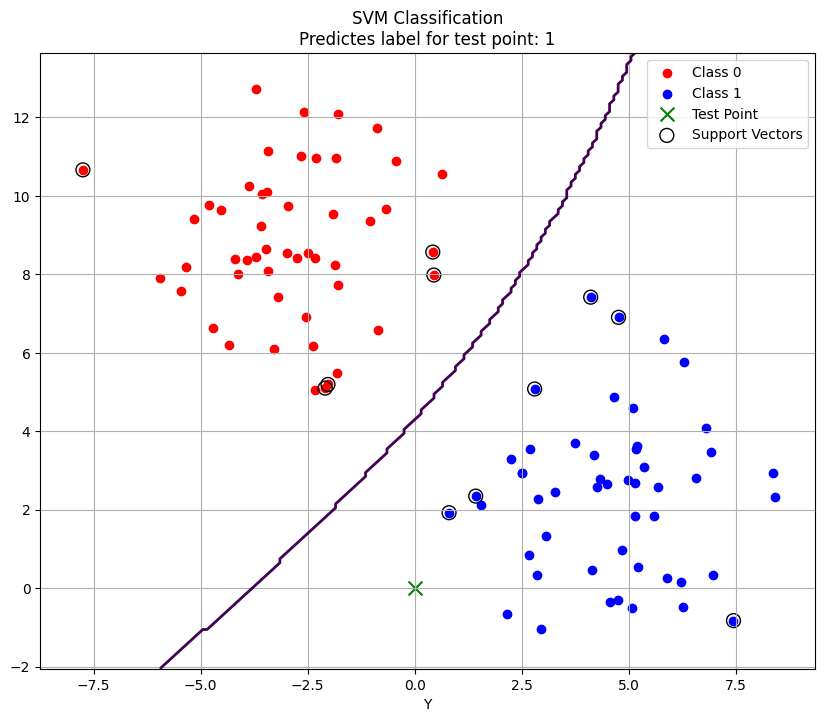

In [13]:
xx, yy , Z = scatter_vis(x_train,y_train,x_test,svm_model,figsize=(10,8))

plt.contour(xx, yy, Z, levels = [0], linewidths=2, color='k')

# 서포트벡터 시각화
plt.scatter(svm_model.support_vectors_[:,0],svm_model.support_vectors_[:,1], s=100, facecolor = 'none', edgecolors='k',
            label='Support Vectors')

plt.legend()
plt.xlabel('X')
plt.xlabel('Y')
plt.title(f"SVM Classification\nPredictes label for test point: {predicted_label[0]}")
plt.grid(True)
plt.show()

Decision Tree

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


In [15]:
# 복잡한 샘플 데이터 생성
x_train, y_train = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, 
                                       random_state=42)

# 테스트 데이터 생성
x_test = np.array([[0,0]])

In [16]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
# 예측
predicted_label = tree_model.predict(x_test)

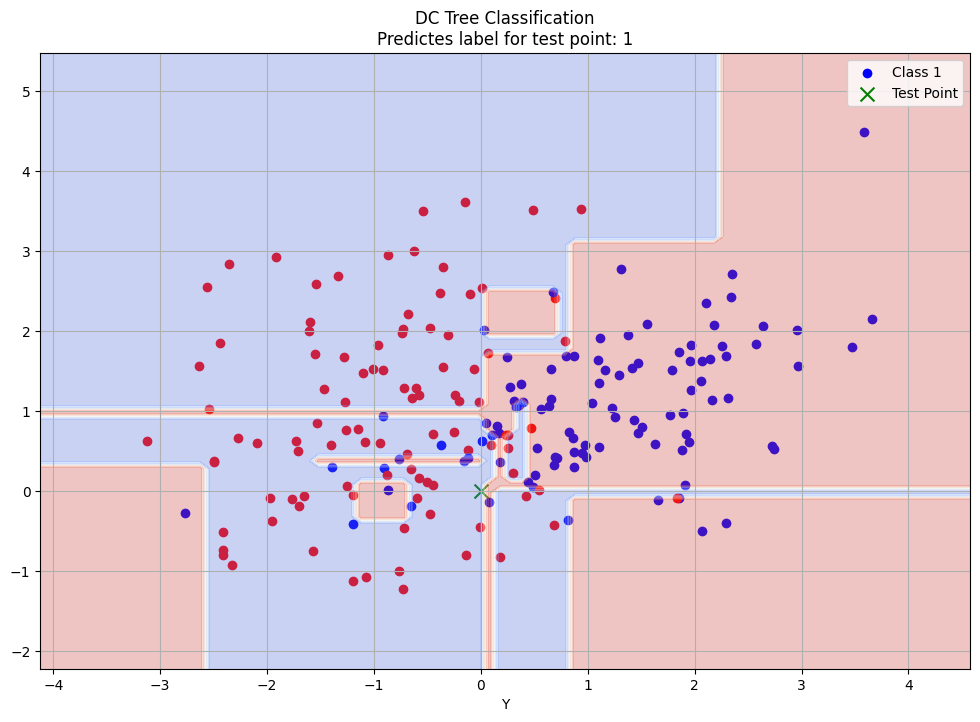

In [18]:
# 시각화
xx,yy,Z = scatter_vis(x_train,y_train,x_test,tree_model,figsize=(12,8))
plt.contourf(xx, yy, Z, alpha=0.3,cmap=plt.cm.coolwarm)

plt.legend()
plt.xlabel('X')
plt.xlabel('Y')
plt.title(f"DC Tree Classification\nPredictes label for test point: {predicted_label[0]}")
plt.grid(True)
plt.show()

# 의사결정나무 구조 시각화


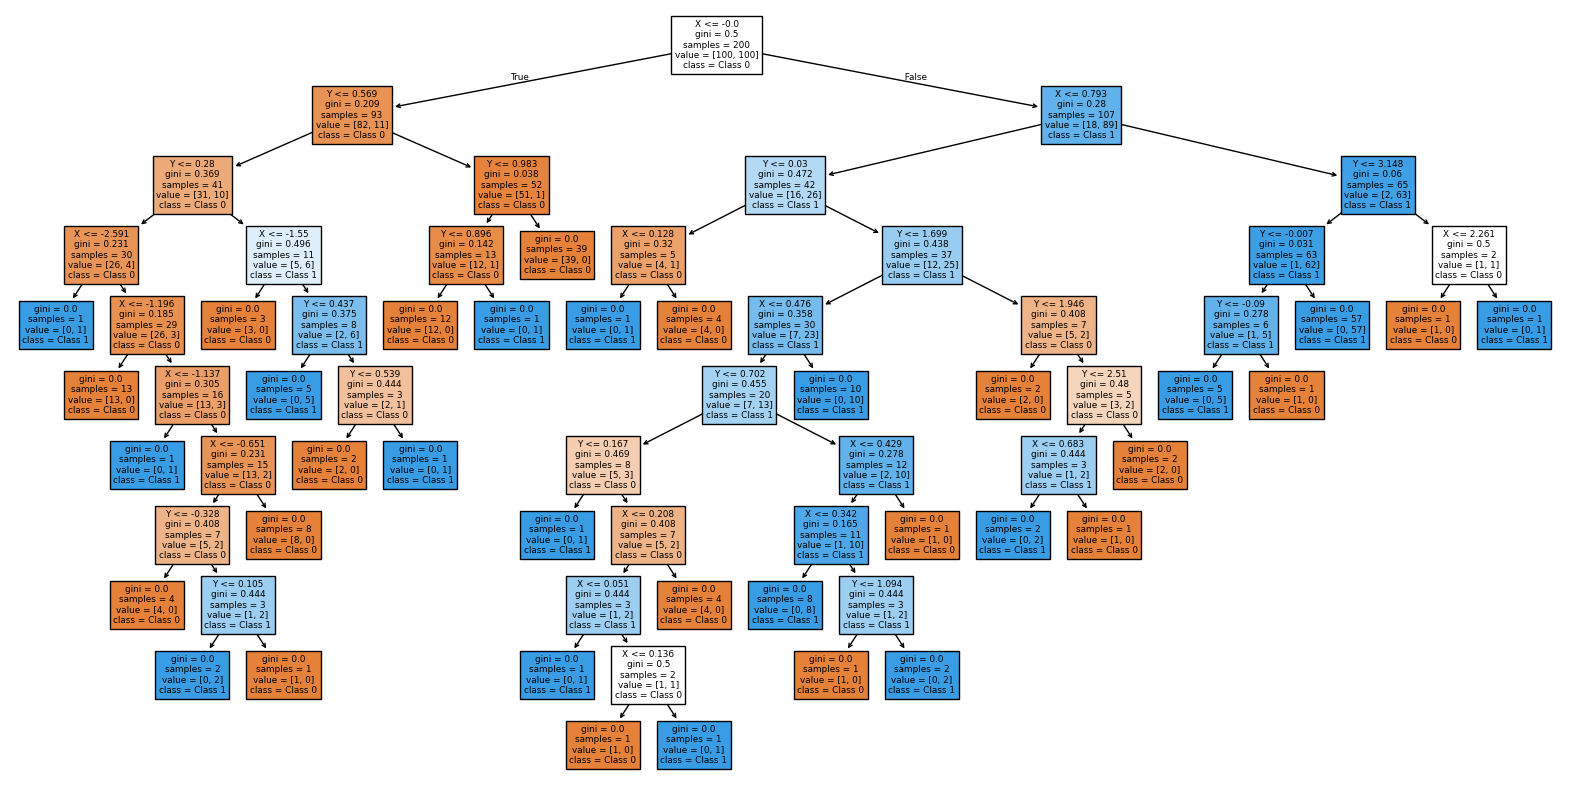

In [19]:
# 트리구조 시각화
plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=['X','Y'],class_names = ['Class 0','Class 1'])
plt.show()

In [20]:
tree_model.score(x_train,y_train)

1.0

### 비지도학습 Unsupervised Learning

### k-means clustering
    k:군집(클러스터)의 개수


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans


In [22]:
# 데이터 불러오기
iris = load_iris()
X = iris.data
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [23]:
# 데이터 전처리 - 스케일링
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

x_scaled = scaler.fit_transform(X)

In [24]:
# 모델 생성
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=42)

In [25]:
# PCA(Princilpe Component Anaysis, 주성분분석)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

In [26]:
label = kmeans.labels_  # lebel이 아닌 cluster값

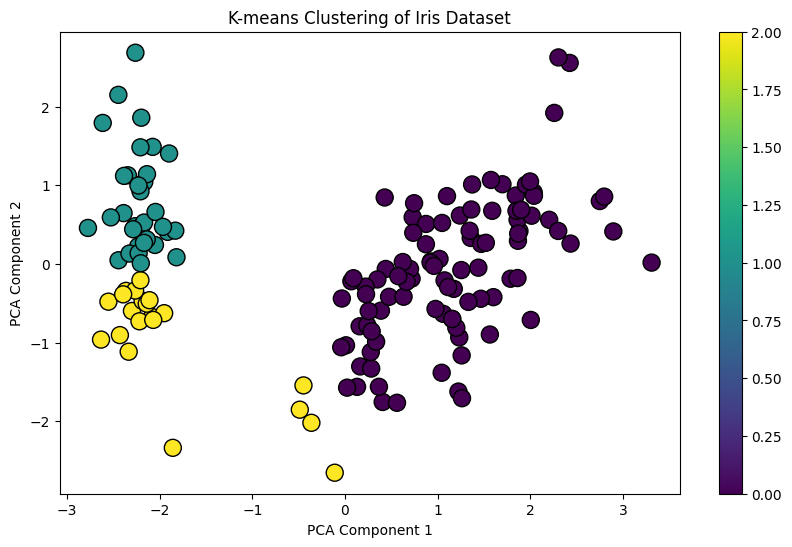

In [27]:
# 시각화
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=label,cmap='viridis',edgecolor='k',s=150)
plt.title('K-means Clustering of Iris Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

In [28]:
# random data로 kmeansclustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

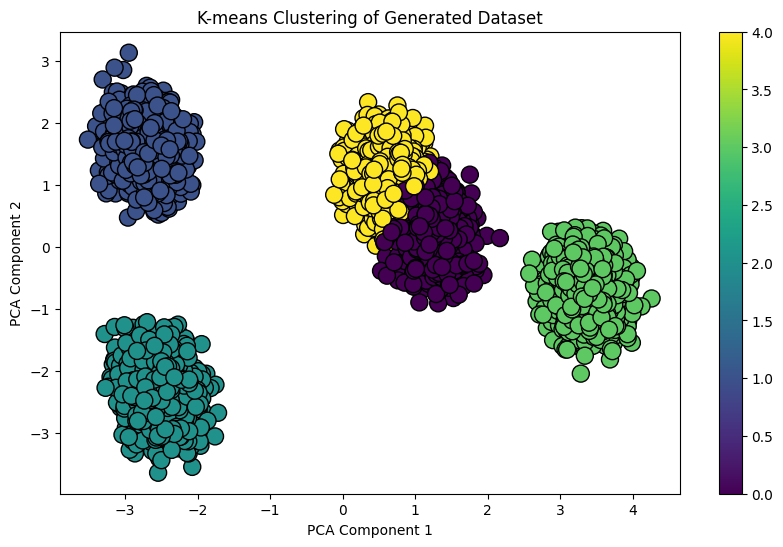

In [32]:
# 데이터 생성
n_samples = 10000
n_features = 10
n_cluster = 5
X, y = make_blobs(n_samples= n_samples, n_features=n_features, centers = n_cluster, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

# K-means clustering
kmeans = KMeans(n_clusters = n_cluster, random_state=42)
kmeans.fit(x_scaled)
labels = kmeans.labels_

# PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

# 시각화
plt.figure(figsize=(10,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=labels,cmap='viridis',edgecolor='k',s=150)
plt.title('K-means Clustering of Generated Dataset')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()
